In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/customer_shopping_behavior.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df['Review Rating']=df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.columns=df.columns.str.replace(' ','_')

In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Rename the columns 'purchase_amount'

In [ ]:
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})


Create a column age_group

In [ ]:
labels=['Young Adult','Adult','Middle_aged','Senior']
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)

In [ ]:
df[['age','age_group']].head()

,age,age_group
0,55,Middle_aged
1,19,Young Adult
2,50,Middle_aged
3,21,Young Adult
4,45,Middle_aged


Create a column purchase_frequency days

In [ ]:
frequency_mapping={
    'Fortnightly':14,
    'Weekly':7,
    'Monthly':30,
    'Quarterly':90,
    'Annually':365,
    'Bi-Weekly':14,
    'Every 3 Months':90
}
df['purchase_frequency_days']=df['frequency_of_purchases'].map(frequency_mapping)
df[['frequency_of_purchases','purchase_frequency_days']].head()

,frequency_of_purchases,purchase_frequency_days
0,Fortnightly,14
1,Fortnightly,14
2,Weekly,7
3,Weekly,7
4,Annually,365


In [ ]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [ ]:
(df['discount_applied']==df['promo_code_used']).all()

np.True_

In [ ]:
print(df.columns)

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_days'],
      dtype='object')


In [ ]:
df = df.drop(columns=['promo_code_used'], errors='ignore',axis=1)


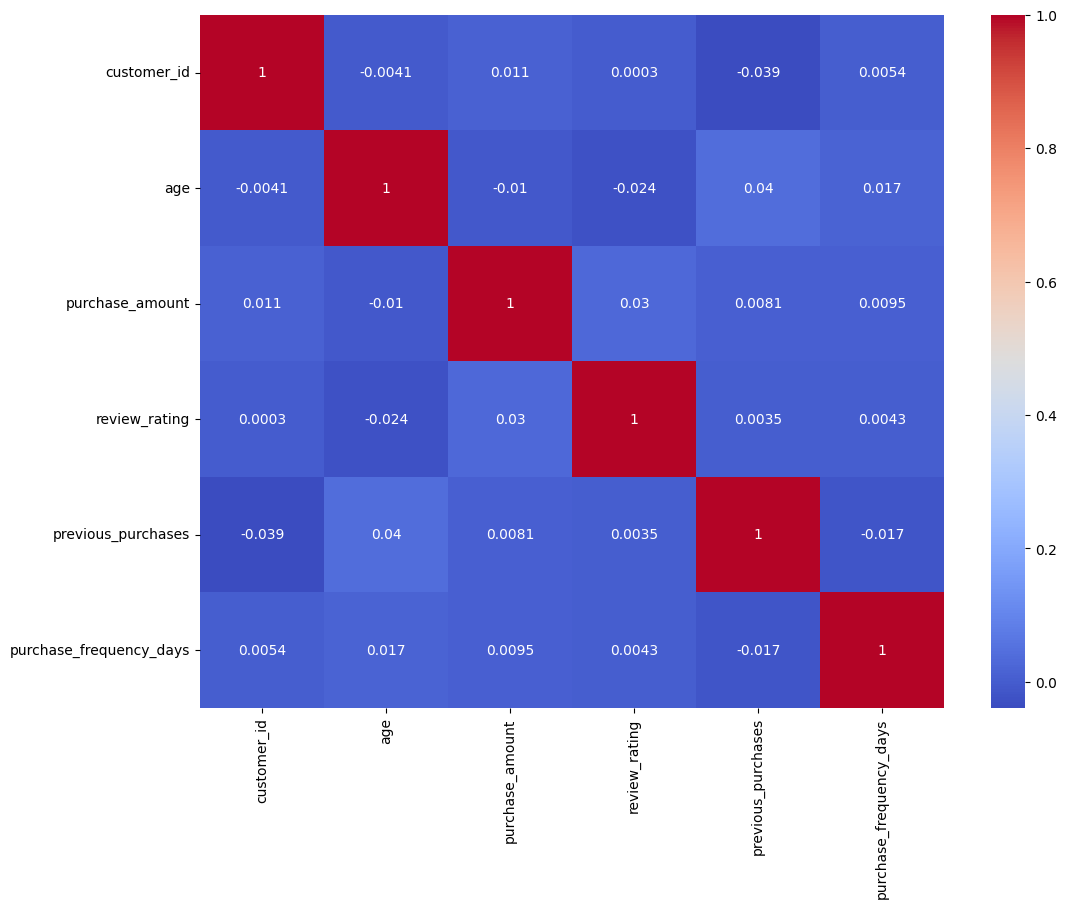

In [ ]:
plt.figure(figsize=(12,9))
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.show()

Category by Review Rating

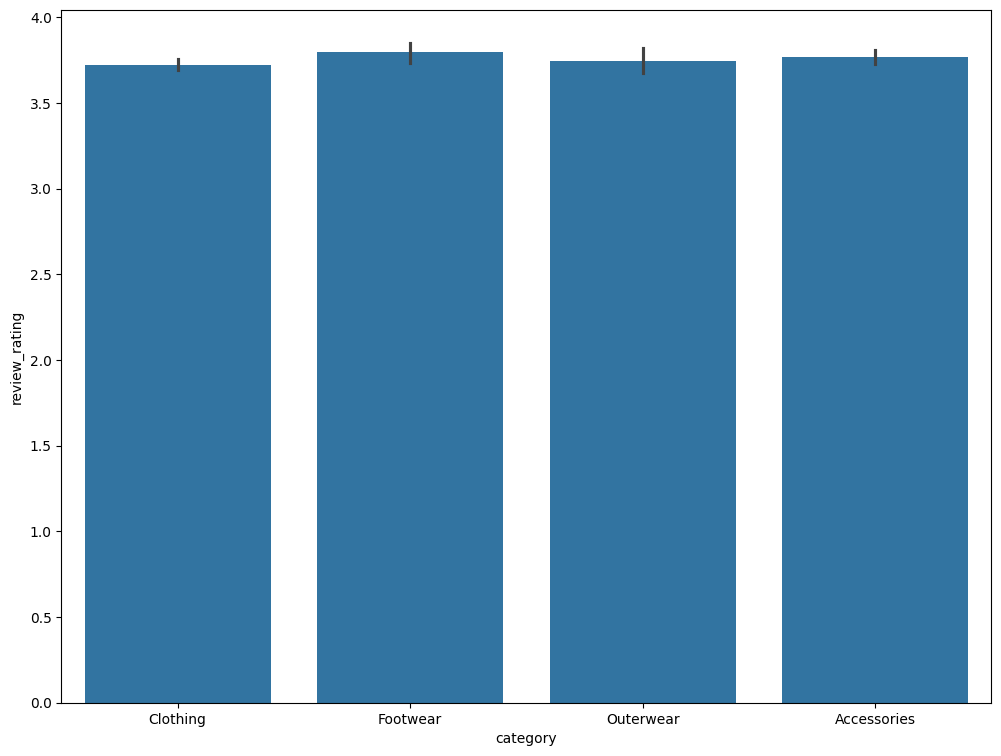

In [ ]:

plt.figure(figsize=(12,9))
sns.barplot(x='category',y='review_rating', data=df)
plt.show()

In [ ]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle_aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle_aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle_aged,365


% of Subcription Status

([<matplotlib.patches.Wedge at 0x7c084ba6a450>,
 [Text(-0.7274432323850631, 0.8251220174357071, 'No'),
  Text(0.7274433045195209, -0.8251219538405942, 'Yes')],
 [Text(-0.39678721766457986, 0.4500665549649311, '73.0%'),
  Text(0.3967872570106477, -0.4500665202766877, '27.0%')])

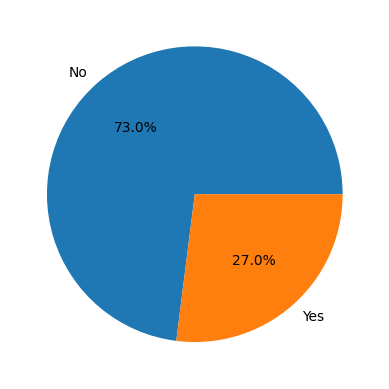

In [ ]:
plt.pie(df['subscription_status'].value_counts(),labels=df['subscription_status'].value_counts().index,autopct='%1.1f%%')

#Discount_applied by Purchase_amount

<Axes: xlabel='discount_applied', ylabel='purchase_amount'>

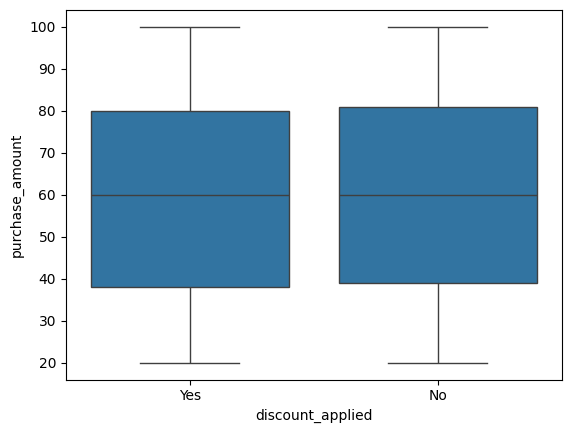

In [ ]:
sns.boxplot(x='discount_applied',y='purchase_amount',data=df)

#Count the Gender based on category

<Axes: xlabel='category', ylabel='count'>

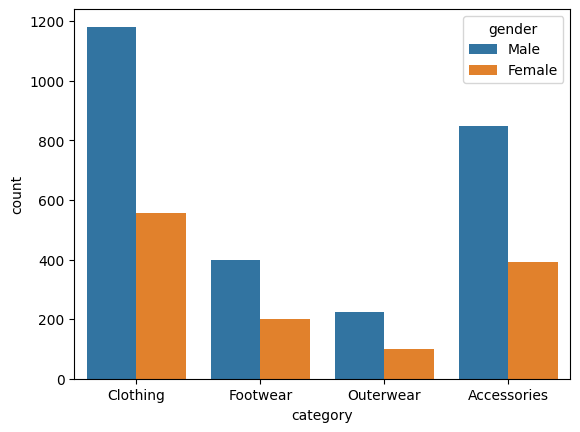

In [ ]:
sns.countplot(x='category',hue='gender',data=df)

In [ ]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle_aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle_aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle_aged,365


Revenue by category

<Axes: xlabel='category', ylabel='purchase_amount'>

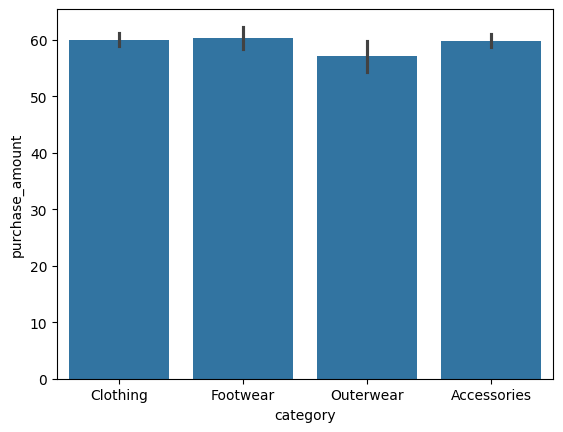

In [ ]:
sns.barplot(x='category',y='purchase_amount',data=df)

#Revenue by Age_group

<Axes: xlabel='age_group', ylabel='customer_id'>

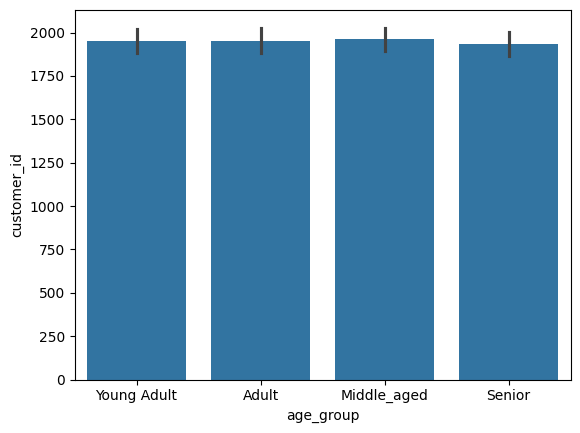

In [ ]:
sns.barplot(x='age_group',y='customer_id',data=df)

#Sales by Age_group

<Axes: xlabel='age_group', ylabel='previous_purchases'>

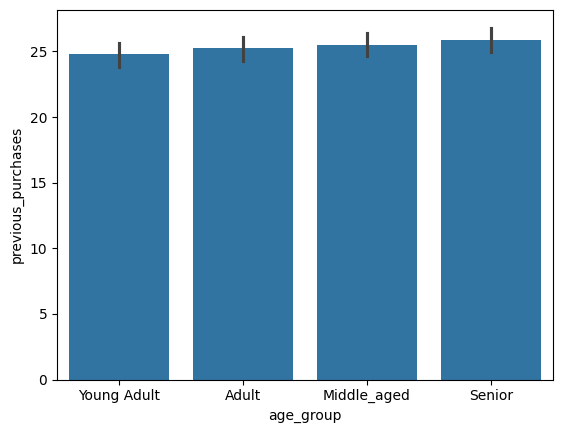

In [ ]:
sns.barplot(x='age_group',y='previous_purchases',data=df)

In [ ]:
w=df.to_csv('customer_shopping_behaviors.csv',index=False)


In [ ]:
pip install pymysql sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import pymysql

username='Anand'
password='Admin@9980'
host='localhost'
port='3306'
database='shopping_behavior'
engine=create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
table_name='shopping_behavior'
df.to_sql(table_name,engine,if_exists='replace',index=False)
pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5;",engine)

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '9980@localhost' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)